In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("./DataSet/Clean_FattyLiver_Data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,5,14423,6,39,0,63.9,155.0,26.615590,7144.0,1581,0


In [53]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0.1    0
Unnamed: 0      0
id              0
age             0
male            0
weight          0
height          0
bmi             0
case.id         0
futime          0
status          0
dtype: int64
(12031, 11)


In [54]:
corr_matrix = df.corr()
corr_matrix['status']*100

Unnamed: 0.1     -0.015095
Unnamed: 0      -12.238358
id               -0.015128
age              33.234667
male              3.668275
weight           -3.920089
height           -6.561682
bmi              -0.810491
case.id          -1.641007
futime           -9.488221
status          100.000000
Name: status, dtype: float64

<Axes: >

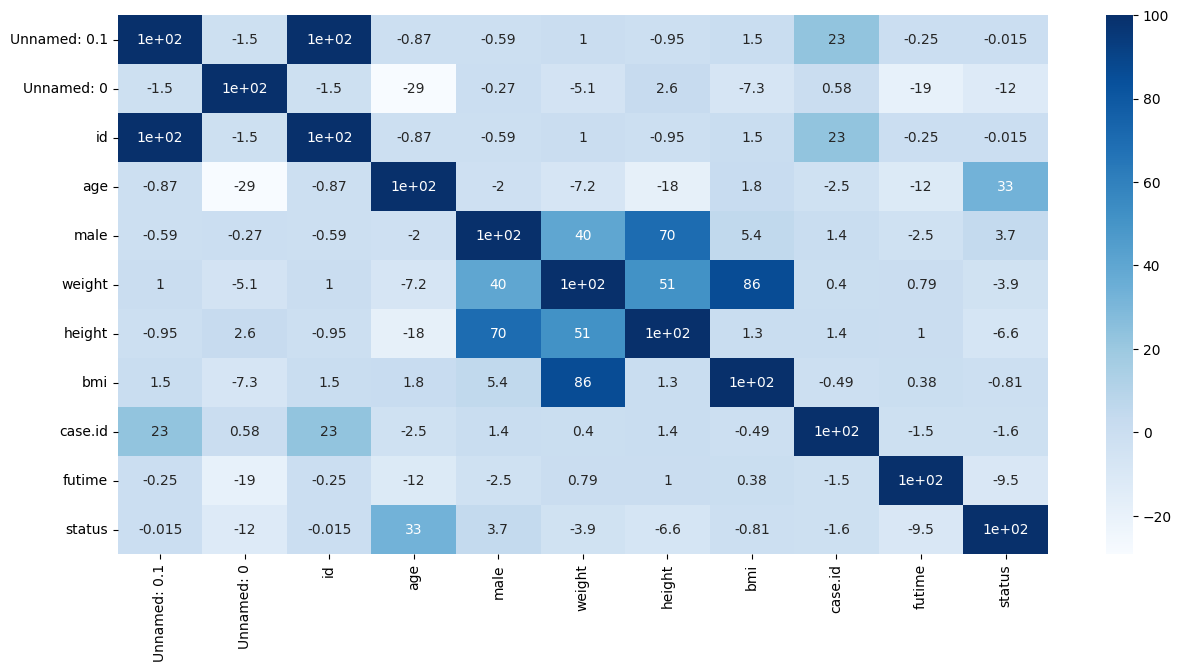

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix*100, annot=True, cmap='Blues')

In [56]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'age', 'male', 'weight', 'height',
       'bmi', 'case.id', 'futime', 'status'],
      dtype='object')

In [57]:
X = df.drop(['Unnamed: 0.1', 'id', 'bmi', 'status','Unnamed: 0','case.id'], axis='columns')
y = df.status
print(X.shape, y.shape)

(12031, 5) (12031,)


In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

### Let's apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [59]:
X_train.shape

(9624, 5)

In [60]:
X_smote.shape

(17682, 5)

In [61]:
### Before smote
pd.Series(y_train).value_counts()

status
0    8841
1     783
Name: count, dtype: int64

In [62]:
### After smote
pd.Series(y_smote).value_counts()

status
0    8841
1    8841
Name: count, dtype: int64

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smote,y_smote)

print("Train Accuracy -> ",lr.score(X_smote,y_smote)*100)
print("Test Accuracy -> ",lr.score(X_test,y_test)*100)

Train Accuracy ->  76.0208121253252
Test Accuracy ->  74.32488574989614


In [64]:
### GridSearchCV
param_grid = [
    {
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4,4,20),
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [100,1000,2000,2500]
    }
]

In [72]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg ,param_grid=param_grid, cv=3, verbose=True, n_jobs = -1)

In [73]:
clf.fit(X_smote,y_smote)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2640 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\babun\AppData\Roaming\Python\Python311\s

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2000, 2500],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             verbose=True)

In [75]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7725935980092751


In [84]:
log_reg_final = LogisticRegression(C=0.03359818286283781, max_iter=100,penalty='l2', solver='newton-cg')
log_reg_final.fit(X_smote,y_smote)

print("Train Accuracy -> ",log_reg_final.score(X_smote,y_smote)*100)
print("Test Accuracy -> ",log_reg_final.score(X_test,y_test)*100)

Train Accuracy ->  77.33288089582626
Test Accuracy ->  75.28043207312007


In [80]:
predictions = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model : {:.2f}%".format(accuracy * 100))

Accuracy of the model : 74.32%


              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2228
           1       0.19      0.77      0.31       179

    accuracy                           0.74      2407
   macro avg       0.58      0.75      0.57      2407
weighted avg       0.92      0.74      0.80      2407



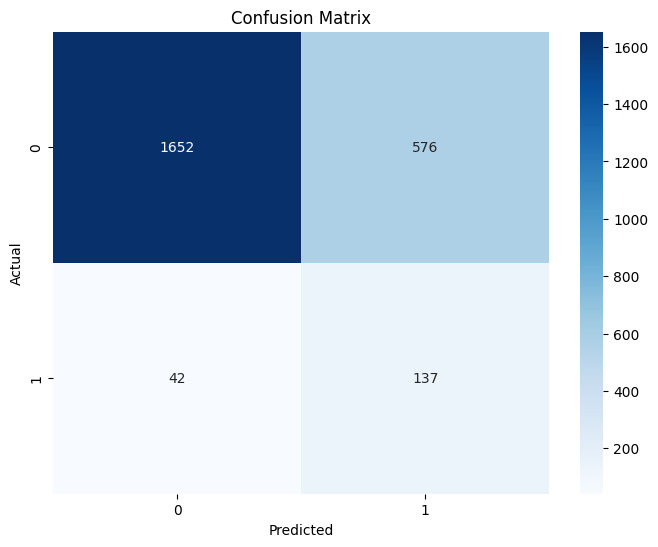

In [85]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)

print(cr)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Get the predicted probabilities for each class
predicted_probabilities = lr.predict_proba(X_test)
# predicted_probabilities[0]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:, 1])

#Let's Compute the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

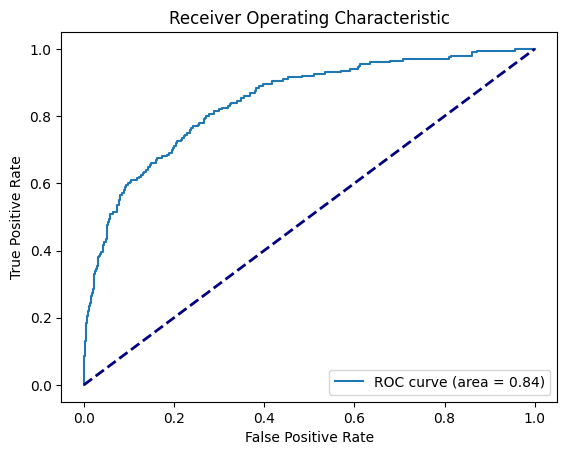

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()